<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Objective" data-toc-modified-id="Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Objective</a></span></li><li><span><a href="#Data-Extraction" data-toc-modified-id="Data-Extraction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Extraction</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Latent-Dirichlet-Allocation-(LDA)" data-toc-modified-id="Latent-Dirichlet-Allocation-(LDA)-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Latent Dirichlet Allocation (LDA)</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#CountVectorizer" data-toc-modified-id="CountVectorizer-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>CountVectorizer</a></span><ul class="toc-item"><li><span><a href="#Train-Test-Split" data-toc-modified-id="Train-Test-Split-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Train Test Split</a></span></li><li><span><a href="#LSA" data-toc-modified-id="LSA-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>LSA</a></span></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Training the Model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-6.1.4"><span class="toc-item-num">6.1.4&nbsp;&nbsp;</span>Evaluation</a></span></li><li><span><a href="#Check-most-important-words" data-toc-modified-id="Check-most-important-words-6.1.5"><span class="toc-item-num">6.1.5&nbsp;&nbsp;</span>Check most important words</a></span></li></ul></li><li><span><a href="#TFIDF" data-toc-modified-id="TFIDF-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>TFIDF</a></span><ul class="toc-item"><li><span><a href="#Modelling" data-toc-modified-id="Modelling-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Modelling</a></span></li></ul></li><li><span><a href="#BERT" data-toc-modified-id="BERT-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>BERT</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Objective

The objective of this project is to create a Fake News Detector by using NLP. The model will be trained on a kaggle dataset which already contains news articles that are identified are real and fake. These articles refer to the US elections of 2016. The model will then be evaluated on data that will be scraped from Politifact, with news about the US elections of 2020.

# Data Extraction

In [2]:
fake = pd.read_csv('https://raw.githubusercontent.com/tmcdonald92/Projects/master/Fake%20News%20Detector/datasets/Fake.csv')
real = pd.read_csv('https://raw.githubusercontent.com/tmcdonald92/Projects/master/Fake%20News%20Detector/datasets/True.csv')

In [3]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


**Initial Observations**

Both datasets have the same columns: title, text, subject and date.

The date column won't be needed because we want to predict wether it's fake or not based on what is in the text.

In [5]:
# Add False and True columns on both datasets

fake['target'] = 1
real['target'] = 0

# Append both datasets

news = pd.concat([fake, real]).reset_index(drop = True)

In [6]:
# Shuffle the news dataset to avoid bias
from sklearn.utils import shuffle
news = shuffle(news)
news = news.reset_index(drop=True)

# EDA

In [7]:
news[news.duplicated(keep=False)].sort_values('title')

,title,text,subject,date,target
16208,'Nuclear option' fallout? More extreme U.S. ju...,WASHINGTON (Reuters) - A Republican-backed Sen...,politicsNews,"April 6, 2017",0
42431,'Nuclear option' fallout? More extreme U.S. ju...,WASHINGTON (Reuters) - A Republican-backed Sen...,politicsNews,"April 6, 2017",0
27943,"After U.S. veto, U.N. General Assembly to meet...",UNITED NATIONS (Reuters) - The 193-member Unit...,worldnews,"December 19, 2017",0
6131,"After U.S. veto, U.N. General Assembly to meet...",UNITED NATIONS (Reuters) - The 193-member Unit...,worldnews,"December 19, 2017",0
28506,Another U.S. appeals court refuses to revive T...,SAN FRANCISCO/WASHINGTON (Reuters) - President...,politicsNews,"June 12, 2017",0
...,...,...,...,...,...
14692,"White, moldy and French: Russia's response to ...","VERKHNAYA PYSHMA/YEKATERINBURG, Russia (Reuter...",worldnews,"December 21, 2017",0
30378,Zimbabwe's Mnangagwa promises zero tolerance i...,HARARE (Reuters) - Zimbabwean President Emmers...,worldnews,"December 20, 2017",0
22176,Zimbabwe's Mnangagwa promises zero tolerance i...,HARARE (Reuters) - Zimbabwean President Emmers...,worldnews,"December 20, 2017",0
27459,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015",1


In [8]:
news.duplicated().sum()

209

We have 209 duplicates which will need to be dropped

In [9]:
news.drop_duplicates(inplace=True)

In [10]:
news.target.value_counts(normalize=True)

1    0.525364
0    0.474636
Name: target, dtype: float64

We can see that 52.5% of the articles are labeled as Fake and 47.5% are labeled as real news. So we have a balanced dataset

In [11]:
news['year']= news.date.map(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else 'NaN')

In [12]:
news[news.year=='NaN']

,title,text,subject,date,target,year
234,Flashback Video: Susan Rice Says Trump’s Claim...,Susan Rice and Obama were as thick as thieves ...,politics,16-Feb-18,1,NaN
1005,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
1038,WATCH SHERIFF’S Honest Response After a School...,"When it gets down to it, what this sheriff sai...",politics,16-Feb-18,1,NaN
2894,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,18-Feb-18,1,NaN
3313,Democrat Senator Warns Mueller Not To Release ...,"According to The Hill, Democrat Senator Bob Ca...",politics,19-Feb-18,1,NaN
5656,JUST IN: PRESIDENT TRUMP AND FIRST LADY Make S...,"President Trump visits Florida hospital, prai...",politics,16-Feb-18,1,NaN
6374,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
6549,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,19-Feb-18,1,NaN
6821,FACEBOOK’S VP Of Ads BLASTS MEDIA: Majority Of...,Facebook s VP of Advertising took to Twitter t...,politics,17-Feb-18,1,NaN
7009,The DIRTY TRUTH About DACA Recipients…Where Th...,"Yesterday, a second U.S. judge on Tuesday bloc...",politics,15-Feb-18,1,NaN


We can see that the column date is not in the correct format. In some cases, it has a link instead of the date. Another reason why we should drop the column

In [13]:
news.year.unique()

array(['2017', '2016', '2017 ', '2016 ', '2015', 'NaN'], dtype=object)

We can see that we have news articles from 2015 until 2017

Some rows only have the link to the article and not the text of the article itself. We will have to clean the link so that we preserve the title of the article that is inside the link.

In [14]:
news[news.title.str.contains('http')]

,title,text,subject,date,target,year
1005,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
6374,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
7321,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
10290,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...,1,NaN
15333,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
19841,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
27093,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...,1,NaN
30315,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...,1,NaN
30700,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...,1,NaN


Might be better to drop these rows because they contain any text, just the link. And it's only 9 rows which won't have a big impact

In [15]:
real

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


We can also see that, for the factual news, every text starts with the city and the publisher. This could also generate bias, so we might need to remove that from the text

In [16]:
news.isna().sum()

title      0
text       0
subject    0
date       0
target     0
year       0
dtype: int64

There are no missing values

In [17]:
news.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

# Data Preprocessing

There are several steps that should be followed when it comes to preparing data for NLP modelling.

First, some of columns will be dropped because we will only look that the text column.

Second, the text in the text column will have to cleaned and standardized. This involves:

    * Removing punctuation
    * Lowercase the text
    * Remove stop words
    * Tokenize the words
    * Lemmatization of the words (didn't use it in the end because it took too long)

In [18]:
news2 = news.copy()

In [19]:
# Drop the rows with only the link
news2.drop(news2[news2.title.str.contains('http')].index,axis=0, inplace=True)

In [20]:
news2.reset_index(drop=True, inplace=True)

In [21]:
news2 = news2[['text','target']]

In [22]:
# Remove the city and publisher
news2.text = news2.text.map(lambda x: x.split('- ')[1] if len(x.split('- ')) > 1 else x)

In [23]:
# Remove punctuation (code used from https://www.kaggle.com/rodolfoluna/fake-news-detector)
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [24]:
news[news.text==' '].shape[0]

627

In [25]:
# We have 627 rows with blank text, so we need to drop those as well
news2.drop(news2[news2.text == ' '].index,axis=0, inplace=True)

In [26]:
import nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop = stopwords.words('english')
import string

def clean(column):
    
    # convert to lowercase
    lower = column.str.lower()
    #remove punctuation
    punctuation = lower.apply(punctuation_removal)
    # replace the word "saidthe" with "said the"
    replace = punctuation.apply(lambda x: x.replace('saidthe','said the'))
    # remove stop words
    stop_remove = replace.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in (stop)]))
    
    return stop_remove

[nltk_data] Downloading package stopwords to C:\Users\Tiago
[nltk_data]     McDonald\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Tiago
[nltk_data]     McDonald\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
news2['text'] = clean(news2.text)

In [28]:
# Tokenize (code adapted from https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb)
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

news2["tokens"] = news2["text"].apply(tokenizer.tokenize)
news2.head()

,text,target,tokens
0,democrats lying place along main stream media ...,1,"[democrats, lying, place, along, main, stream,..."
1,obama narcacism full swing saturday night 46th...,1,"[obama, narcacism, full, swing, saturday, nigh..."
2,mexico would keep trading canada north america...,0,"[mexico, would, keep, trading, canada, north, ..."
3,security minister ukraine prorussian rebel reg...,0,"[security, minister, ukraine, prorussian, rebe..."
4,pakistan angrily criticized donald trump front...,0,"[pakistan, angrily, criticized, donald, trump,..."


In [29]:
all_words = [word for tokens in news2["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in news2["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

9374603 words total, with a vocabulary size of 216033


In [30]:
# Lemmatization (code adapted from https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb)
# Tried to run this but it was taking a long time

# from nltk.stem import WordNetLemmatizer 

# nltk.download('wordnet')

# lemmatizer = WordNetLemmatizer()

# def lemmatize_text(text):
#    return [lemmatizer.lemmatize(w) for w in news2.text]

# news2.text.apply(lemmatize_text)


# Data Analysis

In [31]:
#!pip install wordcloud
from wordcloud import WordCloud
wc = WordCloud()

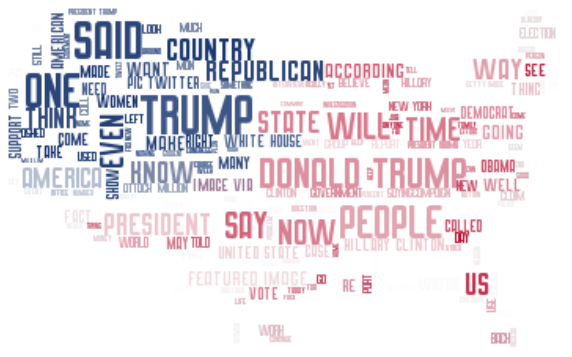

In [32]:
# WordCloud for fake news
from wordcloud import STOPWORDS
from wordcloud import ImageColorGenerator
from PIL import Image
font_path = r'C:\Users\Tiago McDonald\Documents\GitHub\Projects\Fake News Detector\California Signature Duo.ttf'
all_words = ' '.join([text for text in news.text[news.target==1]])
mask = np.array(Image.open(r'C:\Users\Tiago McDonald\Documents\GitHub\Projects\Fake News Detector\images\flag.jpg'))
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(all_words)
image_colors = ImageColorGenerator(mask)
fig = plt.figure(figsize=[10,10])
#wc.to_file("first_review.png")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('wordcloud_fake.png')

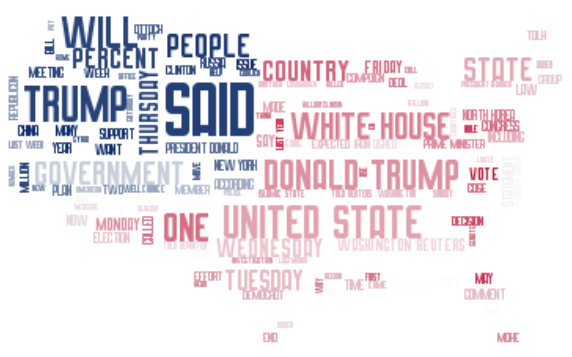

In [33]:
# wordcloud for real news
font_path = r'C:\Users\Tiago McDonald\Documents\GitHub\Projects\Fake News Detector\California Signature Duo.ttf'
all_words = ' '.join([text for text in news.text[news.target==0]])
mask = np.array(Image.open(r'C:\Users\Tiago McDonald\Documents\GitHub\Projects\Fake News Detector\images\flag.jpg'))
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(all_words)
image_colors = ImageColorGenerator(mask)
fig = plt.figure(figsize=[10,10])
#wc.to_file("first_review.png")
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('wordcloud_real.png')

In [34]:
# Check the most frequent words (code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
def frequency(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = tokenizer.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Frequency", y = "Word", color = 'blue')
    ax.set(ylabel = "Words")
    ax.set(xlabel = "Frequency")
    plt.show()

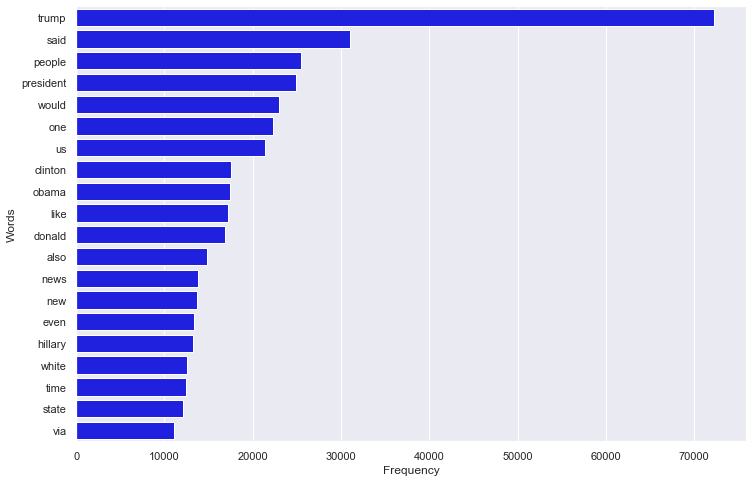

In [35]:
# Most frequent words in fake news
column = news2[news2.target==1]
frequency(column, 'text', 20)

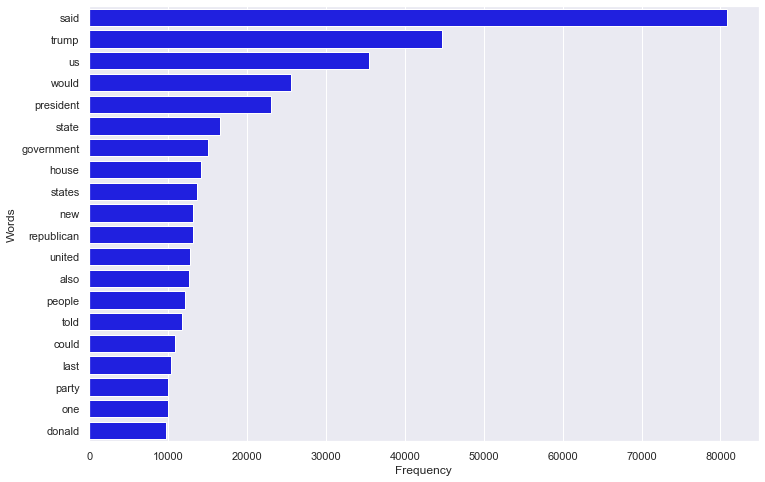

In [36]:
# Most frequent words in factual news
column = news2[news2.target==0]
frequency(column, 'text', 20)

## Latent Dirichlet Allocation (LDA) 

LDA is a helpful to view the most frequent words by topics. It clusters the words by their how often they appear in each document and finds similarities between them.

In [37]:
from gensim.test.utils import common_texts
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

In [38]:
# Create a corpus from a list of texts
common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

In [39]:
news.subject.unique()

array(['left-news', 'politics', 'politicsNews', 'worldnews', 'News',
       'US_News', 'Government News', 'Middle-east'], dtype=object)

We have 8 different topics in this dataset, although some are very similar. So we will choose 4/5 topics in the LDA model to see how it clusters the words

In [40]:
# Importing Gensim
import gensim
from gensim import corpora

# Splitting the words in the articles
word_split = [doc.split() for doc in news2.text] 

# Creating the term dictionary of our courpus, where every unique term is assigned an index. 
dictionary = corpora.Dictionary(word_split)

# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in word_split]

In [41]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=4, id2word = dictionary, passes=3)

#print(ldamodel.print_topics(num_topics=5, num_words=3))

In [42]:
#!pip install pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(ldamodel, corpus=doc_term_matrix, dictionary=dictionary)
pyLDAvis.display(vis)

So we can see that the model created 4 imaginary topics, which corresponds to 4 clusters. In each cluster we can see the most relevant words that represent that cluster. They are clearly separated which means that we have 4 distinctive topics. Most of the words appear in all clusters, but what matters is how frequent they appear in each of them. That is what defines each cluster.

# Modelling

## CountVectorizer

First we are going to start with the Bag of Words method, just by counting the frequency of each word using the **CountVectorizer**, and then applying a Logistic Regression to predict the results.

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# code adapted from https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb

cv = CountVectorizer()

list_corpus = news2["text"].tolist()
list_labels = news2["target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, random_state=40)

X_train_counts = cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

### LSA

We will use LSA (Latent Semantic Analysis) through the function TruncatedSVD to visualize the the dependent variable in 2 dimensions, to check if the values are clearly separated. TruncatedSVD is similar to PCA, but more useful when working with text

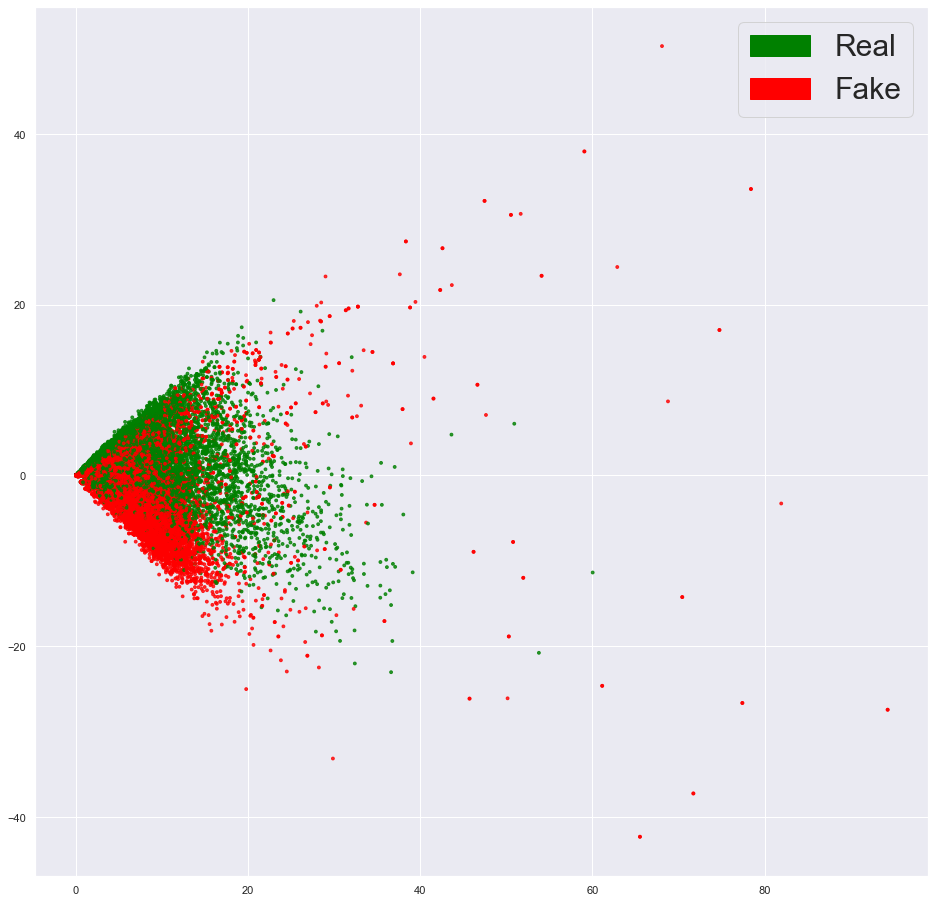

In [44]:
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches

def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        colors = ['green','red']
        plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
        green_patch = mpatches.Patch(color='green', label='Real')
        red_patch = mpatches.Patch(color='red', label='Fake')
        plt.legend(handles=[green_patch, red_patch], prop={'size': 30})

fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_counts, y_train)
plt.show()
fig.savefig('LSA1.png')

We can see that the two classes are not well distinguished. But we will try the Logistic Regression to check the score

### Training the Model

In [45]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C=30, n_jobs=-1, random_state=40) # the c parameter helps avoid overfitting
lg_fit = lg.fit(X_train_counts, y_train)

y_pred_counts = lg.predict(X_test_counts)

### Evaluation

In [46]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted)             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted)
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted)
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred_counts)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy, precision, recall, f1))

accuracy = 0.980, precision = 0.979, recall = 0.981, f1 = 0.980


C:\Users\Tiago McDonald\anaconda3\lib\site-packages\scikitplot\plotters.py:37: DeprecationWarning: This module was deprecated in version 0.3.0 and its functions are spread throughout different modules. Please check the documentation and update your function calls as soon as possible. This module will be removed in 0.4.0
  DeprecationWarning)


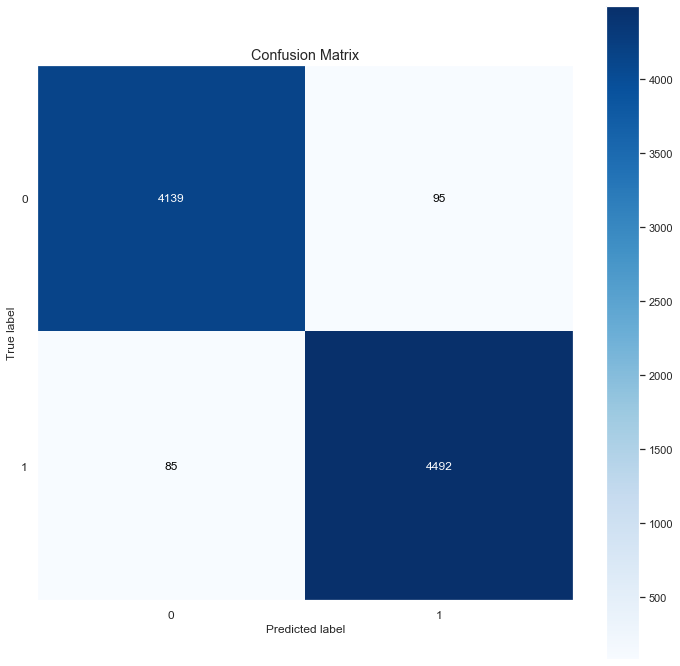

In [47]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_counts,
    figsize=(12,12))

plt.savefig('Confusion Matrix1.png')

So we got an accuracy of 98.3%, with 4610 fake news correctly predicted and 4177 real news correctly predicted. However, we still have some FP and FN so we are going to try to improve this model

### Check most important words

In [48]:
def get_most_important_features(vectorizer, model, n=5): # n is the number of words that I want to get by default
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]): # In the case of Logistic Regression, the range will be 1
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(cv, lg, 10)

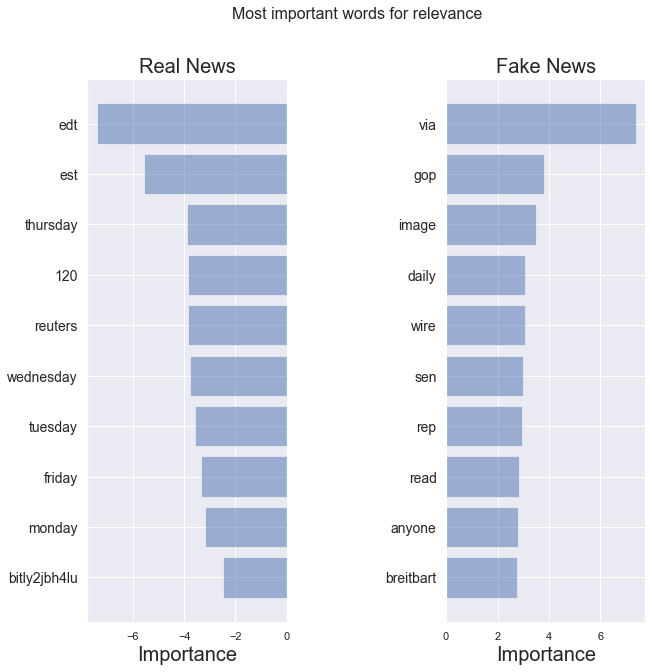

<Figure size 432x288 with 0 Axes>

In [49]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Real News', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Fake News', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

plt.savefig('Important Words1.png')

The plot above shows the most relevant words that the model assumed were to predict wether the news article is fake or not. Apparently some of the stop words are still appearing, even though they were removed during the data cleaning process. So that could be one reason why it's failing to predict correctly every article

## TFIDF

Now we will TFIDF method to weigh the most and least frequent words, so that the words that appear rarely have a higher weight.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

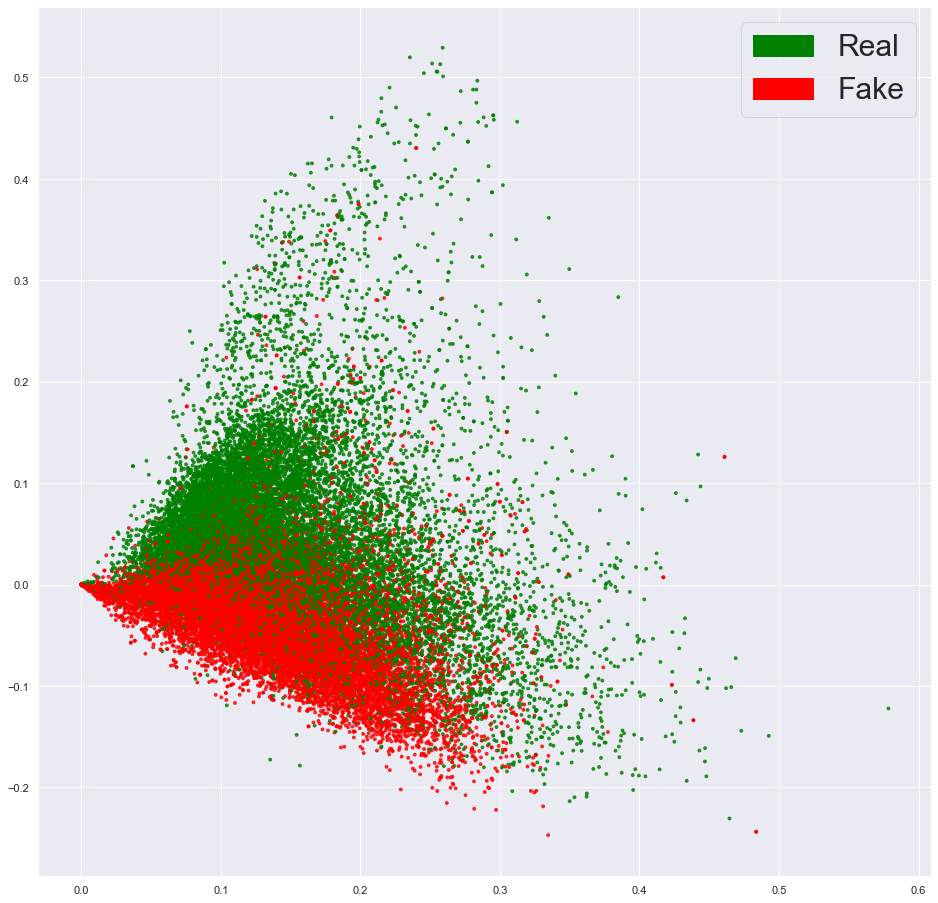

<Figure size 432x288 with 0 Axes>

In [51]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, y_train)
plt.show()
plt.savefig('LSA_TFIDF.png')

We can see that by using the TFIDF method the model can distinguish more between the two classes

### Modelling

In [52]:
# We will use the Logistic Regression again to compare it with the previous model
clf_tfidf = LogisticRegression(C= 30, class_weight='balanced', 
                         multi_class='multinomial', n_jobs=-1, random_state=40)

clf_tfidf.fit(X_train_tfidf, y_train)

y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)

In [53]:
accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf = get_metrics(y_test, y_pred_tfidf)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_tfidf, precision_tfidf, 
                                                                       recall_tfidf, f1_tfidf))

accuracy = 0.983, precision = 0.981, recall = 0.986, f1 = 0.984


We can see that the score improved in this model compared to the previous one.

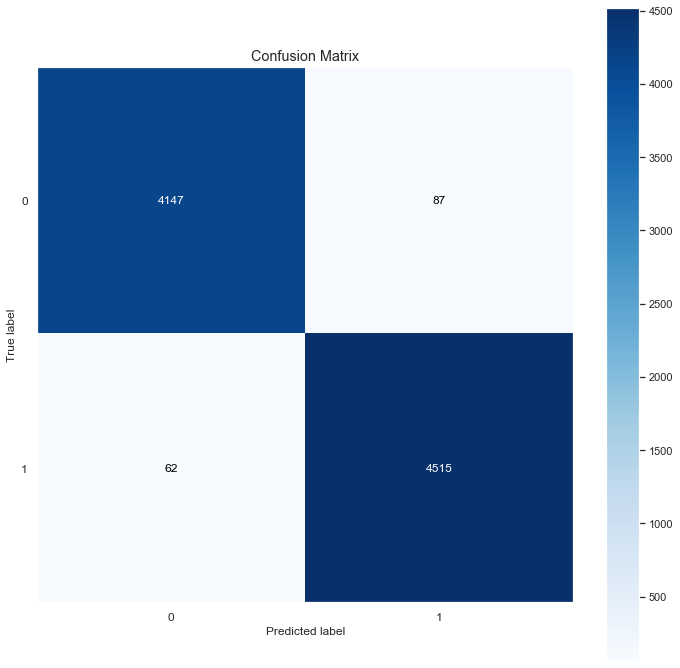

In [54]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_tfidf,
    figsize=(12,12))

plt.savefig('Confusion Matrix2.png')

We can see that we have less FP and FN, which confirms the score that we saw earlier. Now let's check if the most relevant words for the prediction also changed:

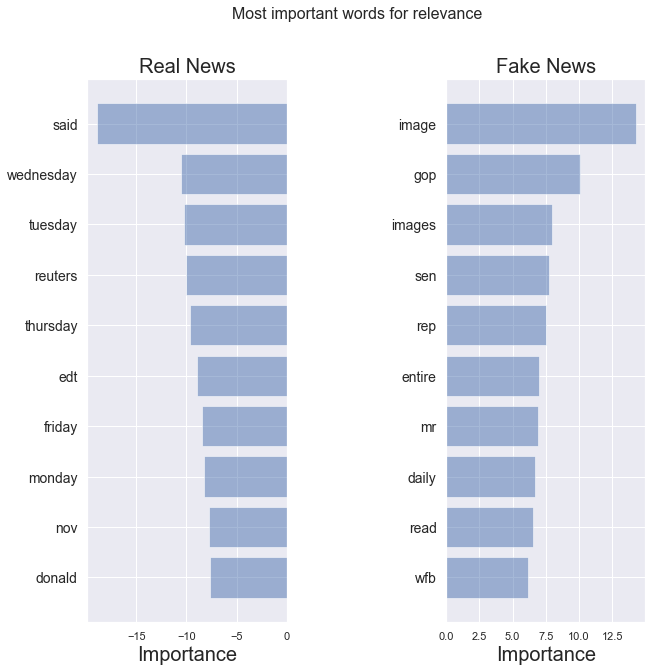

In [55]:
importance_tfidf = get_most_important_features(tfidf, clf_tfidf, 10)
top_scores = [a[0] for a in importance_tfidf[0]['tops']]
top_words = [a[1] for a in importance_tfidf[0]['tops']]
bottom_scores = [a[0] for a in importance_tfidf[0]['bottom']]
bottom_words = [a[1] for a in importance_tfidf[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

We can see some changes in the ranking.

In the real news ranking, the word "said" is now the most relevant word. We also don't have any stop words like "it" and "the" anymore in the ranking, which means that the TFIDF with English stop words worked.

In the fake news ranking, "image" and "images" are now at the top, replacing the word "via" that was the most relevant in the previous model.

## BERT

Although the previous models worked well, there is still room for improvement. One thing that TF-IDF and the Bag of Words fails to analyse is the context in which the words are used. A word can have multiple meanings depending on the context, and it's not just by counting the frequency of the word that we will be able to get the real meaning.

For that reason we will now use BERT, which is a pre-trained model that helps identify the semantics of the words in the sentence, as well as predicting the relationship between the sentences (Does sentence B come after sentence A?)

In [56]:
#!pip install transformers
# transformers is needed to import the BERT model

#!conda install -y pytorch torchvision cudatoolkit=10.1 -c pytorch
# cuda is the GPU of pytorch in order to make the model run even faster
# pytorch needs to be installed in order to use the BERT model and not just some of its functionalities

In [57]:
#!pip install torchtext
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# We can't use a tokenized dataset and instead use the tokenizer from BERT because the model has a specific, fixed vocabulary and the tokenizer
# has a particular way of handling out-of-vocabulary words.
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
model.config.num_labels = 1

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [58]:
# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: GeForce GTX 965M


**Code adapted from https://www.kaggle.com/clmentbisaillon/classifying-fake-news-with-bert**

In [59]:
# Freeze the pre trained parameters
for param in model.parameters():
    param.requires_grad = False

# Add three new layers at the end of the network
model.classifier = nn.Sequential(
    nn.Linear(768, 256),
    nn.ReLU(),
    nn.Linear(256, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim=1)
)

model = model.to(device)

In [60]:
criterion = nn.BCELoss().to(device) #BCELoss = Binary Cross Entropy, used for binary classification problems.
optimizer = optim.SGD(model.classifier.parameters(), lr=0.01)

In [61]:
news_model = news[['text','target']]

In [62]:
# Split the training, validation and test set
train_data, validate_data, test_data = np.split(news_model.sample(frac=1), [int(.6*len(news_model)), int(.8*len(news_model))])

train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)

print("Size of training set: {}".format(len(train_data)))
print("Size of validation set: {}".format(len(validate_data)))
print("Size of testing set: {}".format(len(test_data)))

Size of training set: 26813
Size of validation set: 8938
Size of testing set: 8938


In [63]:
# function to preprocess the text
def preprocess_text(text):
    parts = []

    text_len = len(text.split(' '))
    delta = 300
    max_parts = 5
    nb_cuts = int(text_len / delta)
    nb_cuts = min(nb_cuts, max_parts)
    
    
    for i in range(nb_cuts + 1):
        text_part = ' '.join(text.split(' ')[i * delta: (i + 1) * delta])
        parts.append(tokenizer.encode(text_part, return_tensors="pt", max_length=500).to(device))

    return parts

In [64]:
print_every = 300

total_loss = 0
all_losses = []

CUDA_LAUNCH_BLOCKING=1

model.train() #Training the BERTClassifier model

for idx, row in train_data.iterrows():
    text_parts = preprocess_text(str(row['text']))
    label = torch.tensor([row['target']]).long().to(device)

    optimizer.zero_grad()

    overall_output = torch.zeros((1, 2)).float().to(device)
    for part in text_parts:
        if len(part) > 0:
            try:
                input = part.reshape(-1)[:512].reshape(1, -1)
                # print(input.shape)
                overall_output += model(input, labels=label)[1].float().to(device)
            except Exception as e:
                print(str(e))

#     overall_output /= len(text_parts)
    overall_output = F.softmax(overall_output[0], dim=-1)

    if label == 0:
        label = torch.tensor([1.0, 0.0]).float().to(device)
    elif label == 1:
        label = torch.tensor([0.0, 1.0]).float().to(device)

    # print(overall_output, label)

    loss = criterion(overall_output, label)
    total_loss += loss.item()
    
    loss.backward()
    optimizer.step()

    if idx % print_every == 0 and idx > 0:
        average_loss = total_loss / print_every
        print("{}/{}. Average loss: {}".format(idx, len(train_data), average_loss))
        all_losses.append(average_loss)
        total_loss = 0

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


300/26813. Average loss: 0.6711610881487529
600/26813. Average loss: 0.5948143570125103
900/26813. Average loss: 0.5344080236988763
1200/26813. Average loss: 0.46289223346238334
1500/26813. Average loss: 0.48755252158114065
1800/26813. Average loss: 0.41233379165564354
2100/26813. Average loss: 0.3935622374527156
2400/26813. Average loss: 0.40805062785279006
2700/26813. Average loss: 0.3682762790036698
3000/26813. Average loss: 0.37719230268228177
3300/26813. Average loss: 0.327252552966432
3600/26813. Average loss: 0.37766537656464305
3900/26813. Average loss: 0.27654541562777013
4200/26813. Average loss: 0.38112699454029403
4500/26813. Average loss: 0.3320258080594552
4800/26813. Average loss: 0.36649087791641555
5100/26813. Average loss: 0.3089679544007716
5400/26813. Average loss: 0.3648028742747071
5700/26813. Average loss: 0.3250288729152332
6000/26813. Average loss: 0.34107630723621696
6300/26813. Average loss: 0.3003058095664407
6600/26813. Average loss: 0.35288175190178056
690

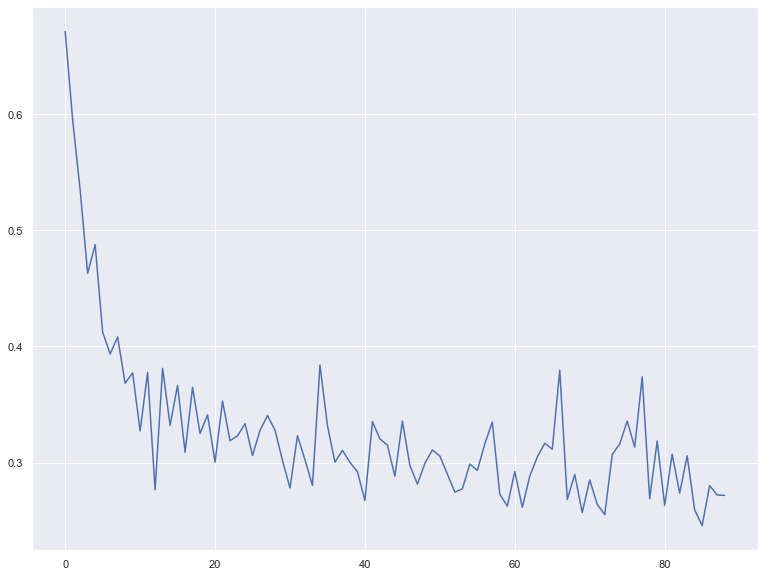

In [65]:
torch.save(model.state_dict(), "model_after_train.pt")

fig = plt.figure(figsize=(13, 10))
plt.plot(all_losses, label='Train')
#plt.plot(valid_losses, label='Valid')
plt.show()
fig.savefig('bert_graph.png')

**Test the accuracy of the model on the test set**

In [66]:
total = len(test_data)
number_right = 0
model.eval()
with torch.no_grad():
    for idx, row in test_data.iterrows():
        text_parts = preprocess_text(str(row['text']))
        label = torch.tensor([row['target']]).float().to(device)
        
        overall_output = torch.zeros((1,2)).to(device)
        try:
            for part in text_parts:
                if len(part) > 0:
                    overall_output += model(part.reshape(1, -1))[0]
        except RuntimeError:
            print("GPU out of memory, skipping this entry.")
            continue
            
        overall_output = F.softmax(overall_output[0], dim=-1)
            
        result = overall_output.max(0)[1].float().item()
 
        if result == label.item():
            number_right += 1
            
        if idx % print_every == 0 and idx > 0:
            print("{}/{}. Current accuracy: {}".format(idx, total, number_right / idx))
            
print("Accuracy on test data: {}".format(number_right / total))

300/8938. Current accuracy: 0.9666666666666667
600/8938. Current accuracy: 0.9666666666666667
900/8938. Current accuracy: 0.9688888888888889
1200/8938. Current accuracy: 0.9708333333333333
1500/8938. Current accuracy: 0.9706666666666667
1800/8938. Current accuracy: 0.9705555555555555
2100/8938. Current accuracy: 0.969047619047619
2400/8938. Current accuracy: 0.9666666666666667
2700/8938. Current accuracy: 0.9644444444444444
3000/8938. Current accuracy: 0.965
3300/8938. Current accuracy: 0.9648484848484848
3600/8938. Current accuracy: 0.9652777777777778
3900/8938. Current accuracy: 0.9656410256410256
4200/8938. Current accuracy: 0.9652380952380952
4500/8938. Current accuracy: 0.9657777777777777
4800/8938. Current accuracy: 0.9664583333333333
5100/8938. Current accuracy: 0.9662745098039216
5400/8938. Current accuracy: 0.9662962962962963
5700/8938. Current accuracy: 0.9666666666666667
6000/8938. Current accuracy: 0.9658333333333333
6300/8938. Current accuracy: 0.966031746031746
6600/8938.

The BERT model manage to correctly predicted 96.5% of the cases in the test set. It is a lower score than the one returned by the Logistic Regression, which was 98%. Still, let's see how the model works on unseen text.

In [67]:
def test(text):
    text_parts = preprocess_text(text)
    overall_output = torch.zeros((1,2)).to(device)
    try:
        for part in text_parts:
            if len(part) > 0:
                overall_output += model(part.reshape(1, -1))[0]
    except RuntimeError:
        print("GPU out of memory, skipping this entry.")

    overall_output = F.softmax(overall_output[0], dim=-1)

    value, result = overall_output.max(0)

    term = "fake"
    if result.item() == 0:
        term = "true"

    print('I am '+str(round((value.item() * 100),0))+'% sure that the article is '+term)

In [68]:
import requests as r
from bs4 import BeautifulSoup
def fact_check(url):
    response = r.get(url)
    soup = BeautifulSoup(response.content)
    text = soup.find('article').getText()
    return test(text)

In [72]:
url = 'https://www.reuters.com/article/us-usa-election-putin/putin-rejects-donald-trumps-criticism-of-biden-family-business-idUSKBN27A0TA'
fact_check(url)

I am 87.0% sure that the article is true
